In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:
df = pd.read_csv('../Datasets/Covid/covid_19_clean_complete.csv')

### Some general information about the dataset

In [3]:
print(df.info())
df[df['Country/Region']=='Greece'].tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17136 entries, 0 to 17135
Data columns (total 8 columns):
Province/State    5304 non-null object
Country/Region    17136 non-null object
Lat               17136 non-null float64
Long              17136 non-null float64
Date              17136 non-null object
Confirmed         17136 non-null int64
Deaths            17136 non-null int64
Recovered         17136 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.0+ MB
None


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
15998,NaN,Greece,39.0742,21.8243,3/25/20,821,22,36
16250,NaN,Greece,39.0742,21.8243,3/26/20,892,26,36
16502,NaN,Greece,39.0742,21.8243,3/27/20,966,28,52
16754,NaN,Greece,39.0742,21.8243,3/28/20,1061,32,52
17006,NaN,Greece,39.0742,21.8243,3/29/20,1156,38,52


### Extracting the day and month 

In [4]:
df['Day']=df['Date'].apply(lambda x: int(x.split('/')[1]))           ##Turn Date into
df['Month']=df['Date'].apply(lambda x: int(x.split('/')[0]))         ##usefull, countable data.

### Sorting the countries
Sorting by confirmed cases, increase of confirmed cases over the previous day, deaths and increase of deaths over the previous day.

In [5]:
Country_List = df['Country/Region'].unique() #List of all countries in dataset
Confirmed_List = [] #List of confirmed cases of the countries in Country_List
Deaths_List = [] #List of deaths in above of the countries in Country_List
D_Confirmed_List = [] #List of change in the number of confirmed cases of the countries in Country_List
D_Confirmed_List_Mul = [] #List of multiplication factor of change in number of confirmed cases of the countries in Country_List
D_Deaths_List = [] #List of change in the number of deaths of the countries in Country_List
D_Deaths_List_Mul = [] #List of multiplication factor of change in the number of deaths of the countries in Country_List

dt = int(str(date.today()).split('-')[2])-int(df[df['Month']==df['Month'].max()]['Day'].max()) # The reference point for date depending on how old the latest data is.

for i in Country_List:
    Confirmed_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Confirmed'].to_numpy()[0])
    Deaths_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Deaths'].to_numpy()[0])
    D_Confirmed_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Confirmed'].to_numpy()[0]-df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt+1)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt+1)).split('-')[2])]['Confirmed'].to_numpy()[0])
    D_Deaths_List.append(df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt)).split('-')[2])]['Deaths'].to_numpy()[0]-df[df['Country/Region']==i][df['Month']==int(str(date.today()-timedelta(days=dt+1)).split('-')[1])][df['Day']==int(str(date.today()-timedelta(days=dt+1)).split('-')[2])]['Deaths'].to_numpy()[0])

for i in range(len(Deaths_List)):
    D_Confirmed_List_Mul.append(Confirmed_List[i]/(Confirmed_List[i]-D_Confirmed_List[i]))
    D_Deaths_List_Mul.append(Deaths_List[i]/(Deaths_List[i]-D_Deaths_List[i]))

Sorted_Confirmed_List = np.argsort(Confirmed_List)  #Sort by Confirmed Cases
Sorted_Deaths_List = np.argsort(Deaths_List)  # Sort by Deaths
Sorted_D_Confirmed_List = np.argsort(D_Confirmed_List) #Sort by change in Confirmed Cases
Sorted_D_Deaths_List = np.argsort(D_Deaths_List) #Sort by change in Deaths

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in longlong_scalars
c:\users\alexa\appdata\local\programs\python\python36\lib

## Printing and vizualizing the latest data

### Based on the confirmed cases

In [6]:
#Making a list of countries with Greece being first while the rest of the countries included are sorted from worst to
#best accounting for the number of confirmed cases.
c_list = [Country_List.tolist().index('Greece')] + np.flip(Sorted_Confirmed_List[-3:]).tolist()

if Country_List.tolist().index('China') not in c_list:
    c_list=[Country_List.tolist().index('China')]+c_list

for i in c_list: #Printing the stats on the 4 countries
    print(Country_List[i]+
          ' \nConfirmed:',Confirmed_List[i],
          ' \nincrease over the previous day:',D_Confirmed_List[i],'(Increased by factor: x'+str(D_Confirmed_List_Mul[i])+')',
          ' \nDeaths:',Deaths_List[i],
          ' \nincrease over the previous day:',D_Deaths_List[i],'(Increased by factor: x'+str(D_Deaths_List_Mul[i])+')',
          ' \n')

print('As of '+str(date.today()-timedelta(days=dt))+'.')

China 
Confirmed: 990  
increase over the previous day: 0 (Increased by factor: x1.0)  
Deaths: 6  
increase over the previous day: 0 (Increased by factor: x1.0)  

Greece 
Confirmed: 1156  
increase over the previous day: 95 (Increased by factor: x1.0895381715362866)  
Deaths: 38  
increase over the previous day: 6 (Increased by factor: x1.1875)  

US 
Confirmed: 140886  
increase over the previous day: 19408 (Increased by factor: x1.1597655542567378)  
Deaths: 2467  
increase over the previous day: 441 (Increased by factor: x1.217670286278381)  

Italy 
Confirmed: 97689  
increase over the previous day: 5217 (Increased by factor: x1.0564170776018686)  
Deaths: 10779  
increase over the previous day: 756 (Increased by factor: x1.0754265190062855)  

Spain 
Confirmed: 80110  
increase over the previous day: 6875 (Increased by factor: x1.0938758790195944)  
Deaths: 6803  
increase over the previous day: 821 (Increased by factor: x1.1372450685389501)  

As of 2020-03-29.


### Ploting the confirmed cases of these countries
Note that we only plot the data AFTER the first reported incident with the virus on each country.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


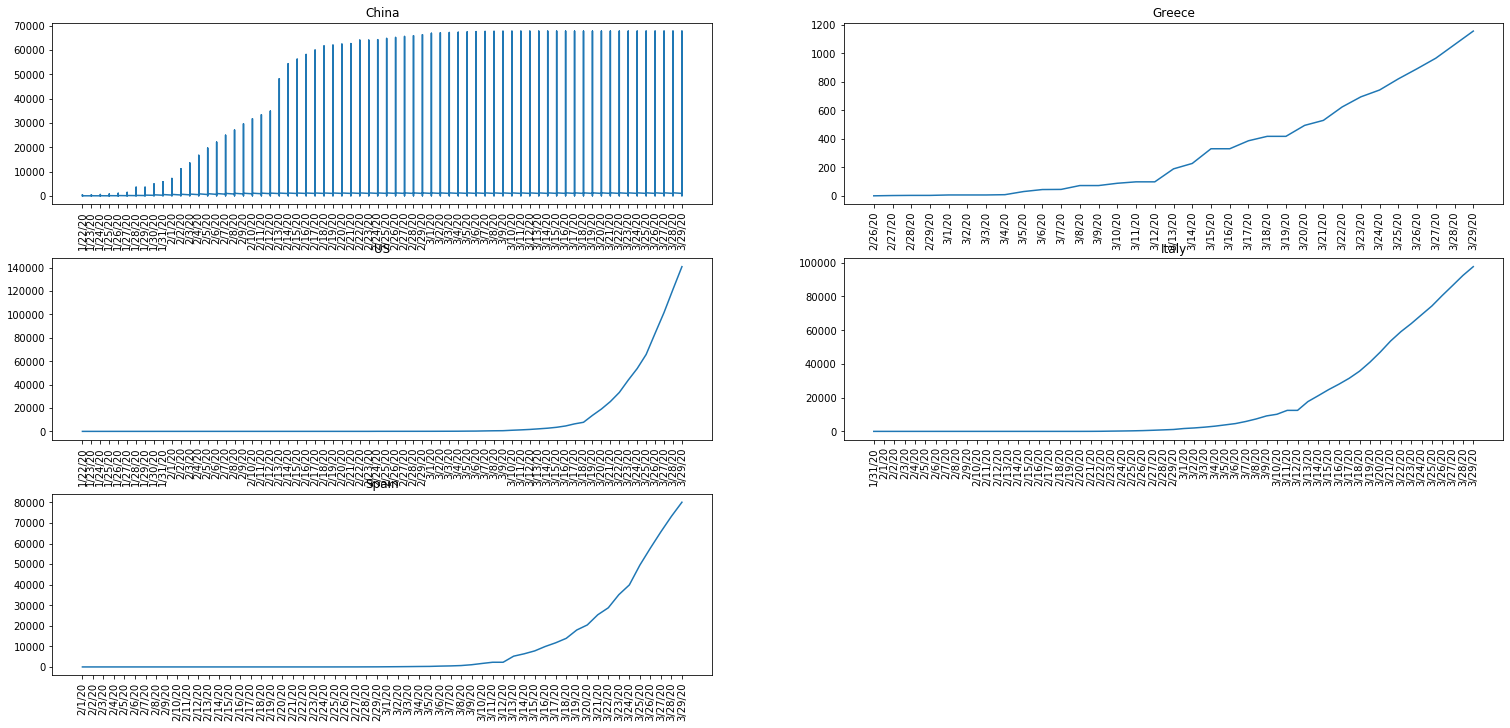

In [7]:
import math

f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(12)
f.set_figwidth(26)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    X = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Date'].to_list()
    Y = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Confirmed'].to_list()
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(90)
    axes[y][x].set_title(Country_List[i])
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1
if (len(c_list)-(2%len(c_list))*2)==1:
    f.delaxes(axes[-1][1])

### Focusing on China
Based on the fact that the 'Confirmed' row contains the total confirmed cases by that date, the data on China seems to be wrongly interpreted.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


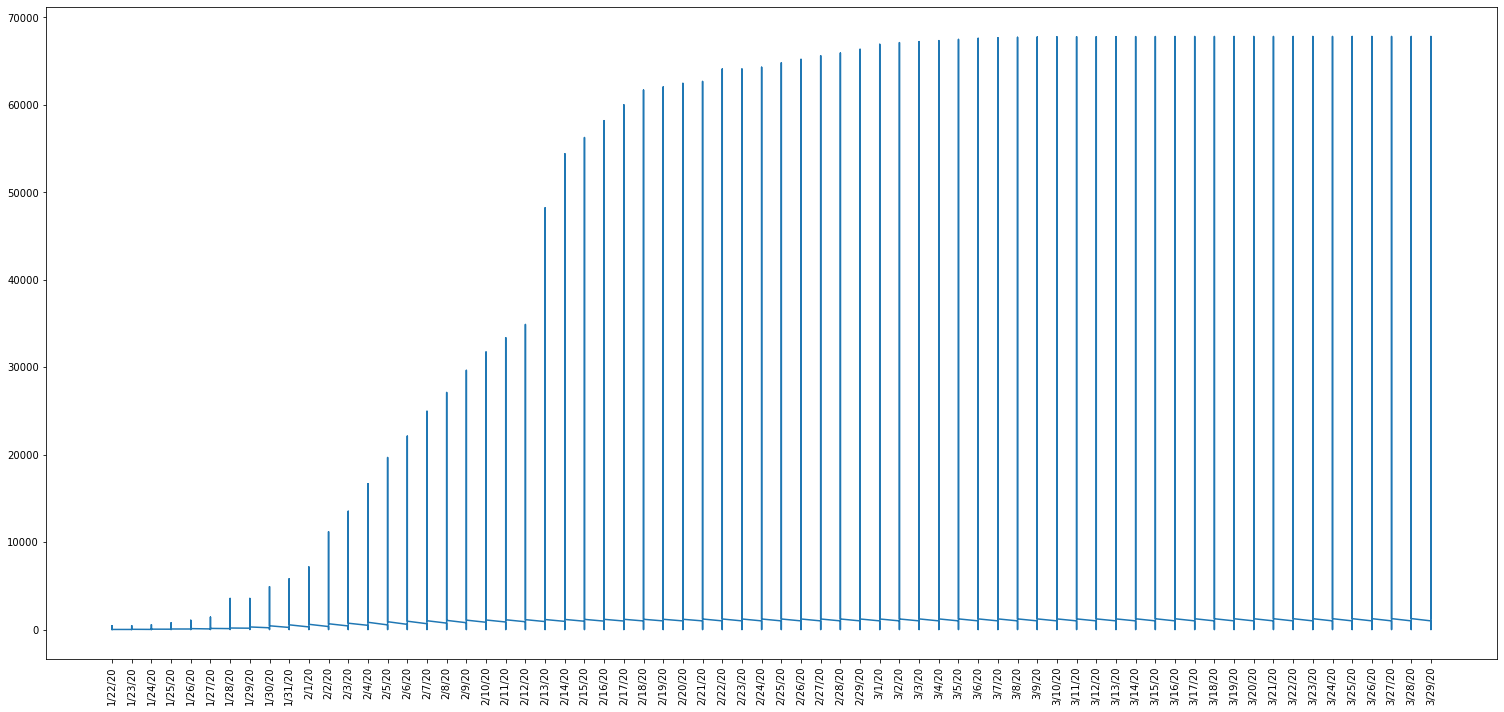

In [8]:
f,ax=plt.subplots(1,1)
f.set_figheight(12)
f.set_figwidth(26)
X = df[df['Country/Region']=='China'][df['Confirmed']>0]['Date'].to_list()
Y = df[df['Country/Region']=='China'][df['Confirmed']>0]['Confirmed'].to_list()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.plot(X,Y)

### Not the case!
Actually, the data for China are sampled based on different states unlike the rest of the countries in the list. You should really take a look at your data before handling it!

In [9]:
df[df['Country/Region']=='China'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day,Month
49,Anhui,China,31.8257,117.2264,1/22/20,1,0,0,22,1
50,Beijing,China,40.1824,116.4142,1/22/20,14,0,0,22,1
51,Chongqing,China,30.0572,107.8740,1/22/20,6,0,0,22,1
52,Fujian,China,26.0789,117.9874,1/22/20,1,0,0,22,1
53,Gansu,China,37.8099,101.0583,1/22/20,0,0,0,22,1


In [10]:
df[df['Country/Region']=='Italy'].head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day,Month
137,NaN,Italy,43.0,12.0,1/22/20,0,0,0,22,1
389,NaN,Italy,43.0,12.0,1/23/20,0,0,0,23,1
641,NaN,Italy,43.0,12.0,1/24/20,0,0,0,24,1
893,NaN,Italy,43.0,12.0,1/25/20,0,0,0,25,1
1145,NaN,Italy,43.0,12.0,1/26/20,0,0,0,26,1


Making a list of countries that label data per Province/State:

In [11]:
p_c_list = df[~pd.isna(df['Province/State'])]['Country/Region'].unique()

### Ploting the real total confirmed cases per day for China
By summing the cases on each state.

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


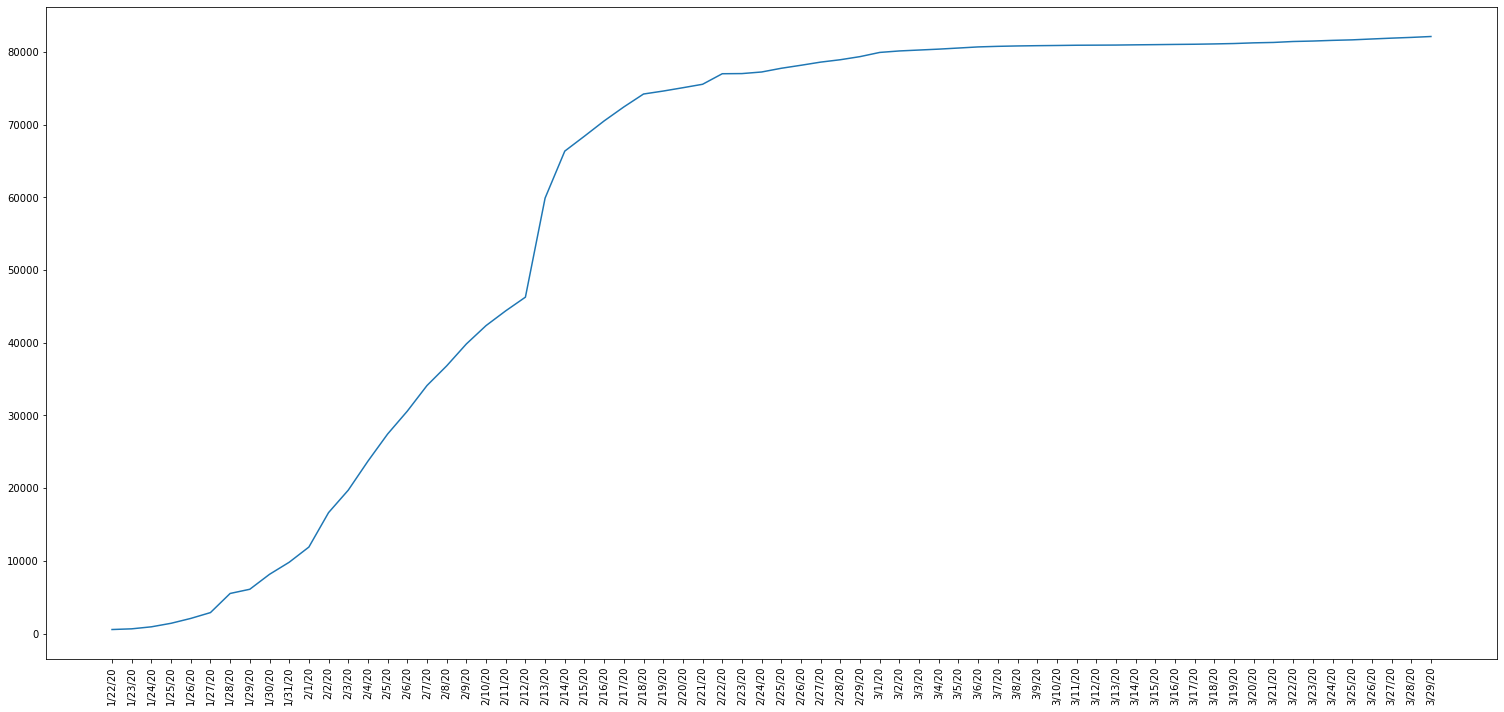

In [12]:
Y_confirmed_total = []
Y_deaths_total = []
X = df[df['Country/Region']=='China']['Date'].unique()

for i in X:
    Y_confirmed_total.append(df[df['Country/Region']=='China'][df['Date']==i]['Confirmed'].sum())
    Y_deaths_total.append(df[df['Country/Region']=='China'][df['Date']==i]['Deaths'].sum())

Confirmed_List[Country_List.tolist().index('China')]=Y_confirmed_total[-1]
D_Confirmed_List[Country_List.tolist().index('China')]=Y_confirmed_total[-1]-Y_confirmed_total[-2]
D_Confirmed_List_Mul[Country_List.tolist().index('China')]=Y_confirmed_total[-1]/Y_confirmed_total[-2]
Deaths_List[Country_List.tolist().index('China')]=Y_deaths_total[-1]
D_Deaths_List[Country_List.tolist().index('China')]=Y_deaths_total[-1]-Y_deaths_total[-2]
D_Deaths_List_Mul[Country_List.tolist().index('China')]=Y_deaths_total[-1]/Y_deaths_total[-2]

f,ax=plt.subplots(1,1)
f.set_figheight(12)
f.set_figwidth(26)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.plot(X,Y_confirmed_total)

### Re-ploting correctly
In regards to the 'abnormal' data format for China

c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


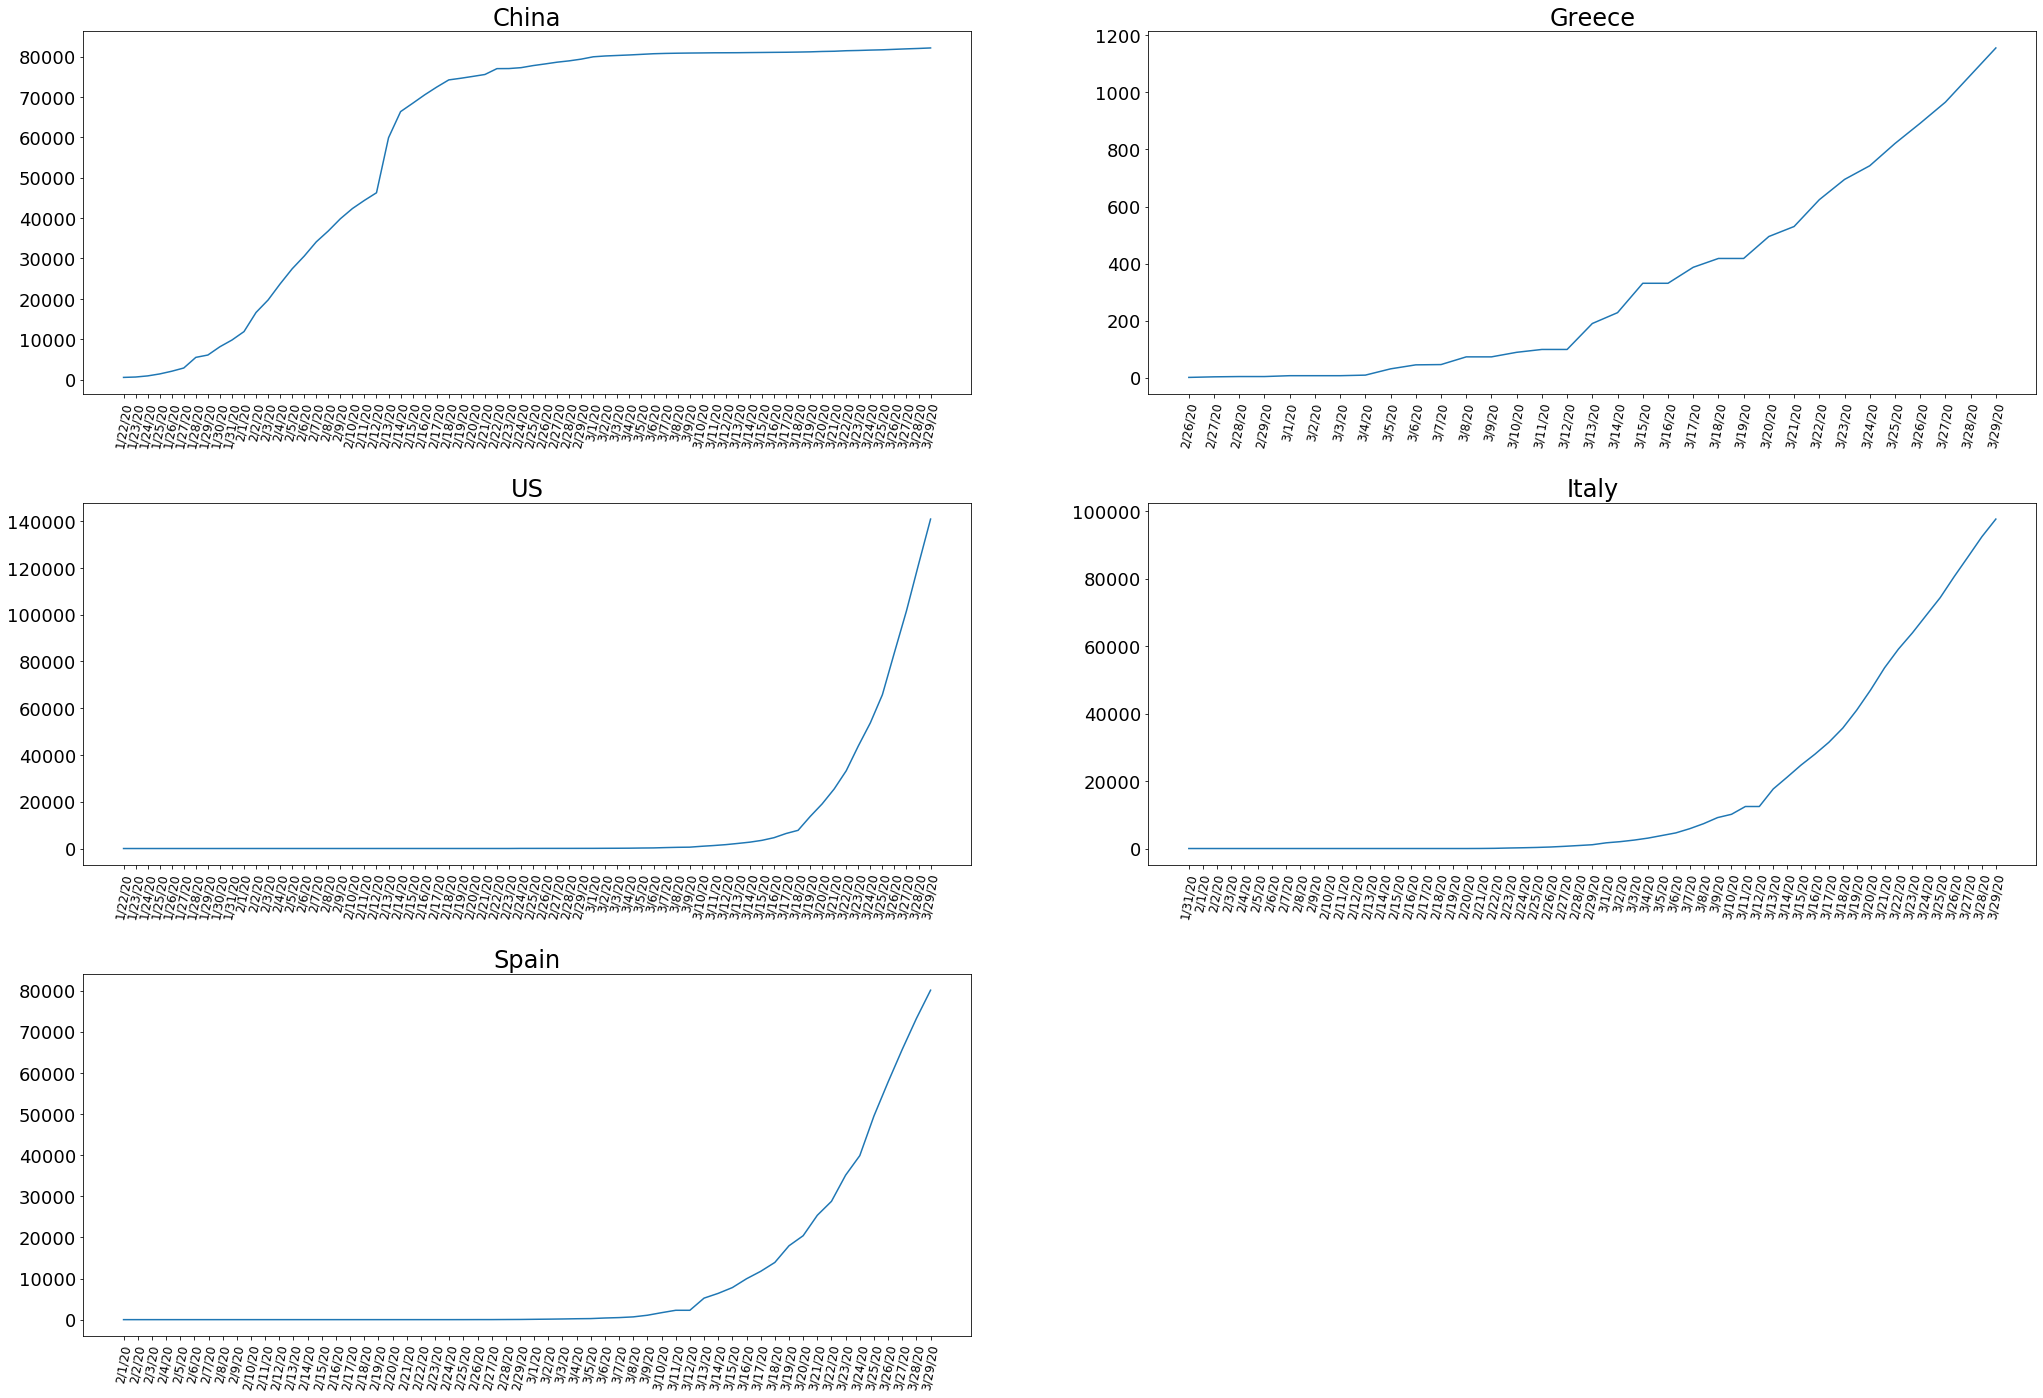

In [13]:
f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(24)
f.set_figwidth(35)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    
    if Country_List[i] not in p_c_list:
        X = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Date'].to_list()
        Y = df[df['Country/Region']==Country_List[i]][df['Confirmed']>0]['Confirmed'].to_list()
    else:
        X = df[df['Country/Region']==Country_List[i]]['Date'].unique()
        Y = []
        for j in X:
            Y.append(df[df['Country/Region']==Country_List[i]][df['Date']==j]['Confirmed'].sum())
        
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(80)
        tick.set_fontsize(12)
        
    for tick in axes[y][x].get_yticklabels():
        tick.set_fontsize(18)
        
    axes[y][x].set_title(Country_List[i],fontsize=24)
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1
if (len(c_list)-(2%len(c_list))*2)==1:
    f.delaxes(axes[-1][1])

It seems that China has impressively managed to reduce the infection rate close to 0, while the rest of the countries are increasing exponentialy.



### Making the same analysis on the countries with most deaths

In [14]:
#Making a list of countries with Greece being first while the rest of the countries included are sorted from worst to
#best accounting for the number of deaths.
c_list = [Country_List.tolist().index('Greece')] + np.flip(Sorted_D_Confirmed_List[-3:]).tolist()

if Country_List.tolist().index('China') not in c_list:
    c_list=[Country_List.tolist().index('China')]+c_list

for i in c_list: #Printing the stats on the 4 countries with biggest change of confirmed cases
    print(Country_List[i]+
          ' \nConfirmed:',Confirmed_List[i],
          ' \nincrease over the previous day:',D_Confirmed_List[i],'(Increased by factor: x'+str(D_Confirmed_List_Mul[i])+')',
          ' \nDeaths:',Deaths_List[i],
          ' \nincrease over the previous day:',D_Deaths_List[i],'(Increased by factor: x'+str(D_Deaths_List_Mul[i])+')',
          ' \n')

print('As of '+str(date.today()-timedelta(days=dt))+'.')

China 
Confirmed: 82122  
increase over the previous day: 123 (Increased by factor: x1.001500018292906)  
Deaths: 3304  
increase over the previous day: 5 (Increased by factor: x1.001515610791149)  

Greece 
Confirmed: 1156  
increase over the previous day: 95 (Increased by factor: x1.0895381715362866)  
Deaths: 38  
increase over the previous day: 6 (Increased by factor: x1.1875)  

US 
Confirmed: 140886  
increase over the previous day: 19408 (Increased by factor: x1.1597655542567378)  
Deaths: 2467  
increase over the previous day: 441 (Increased by factor: x1.217670286278381)  

Spain 
Confirmed: 80110  
increase over the previous day: 6875 (Increased by factor: x1.0938758790195944)  
Deaths: 6803  
increase over the previous day: 821 (Increased by factor: x1.1372450685389501)  

Italy 
Confirmed: 97689  
increase over the previous day: 5217 (Increased by factor: x1.0564170776018686)  
Deaths: 10779  
increase over the previous day: 756 (Increased by factor: x1.0754265190062855)  


c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
c:\users\alexa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


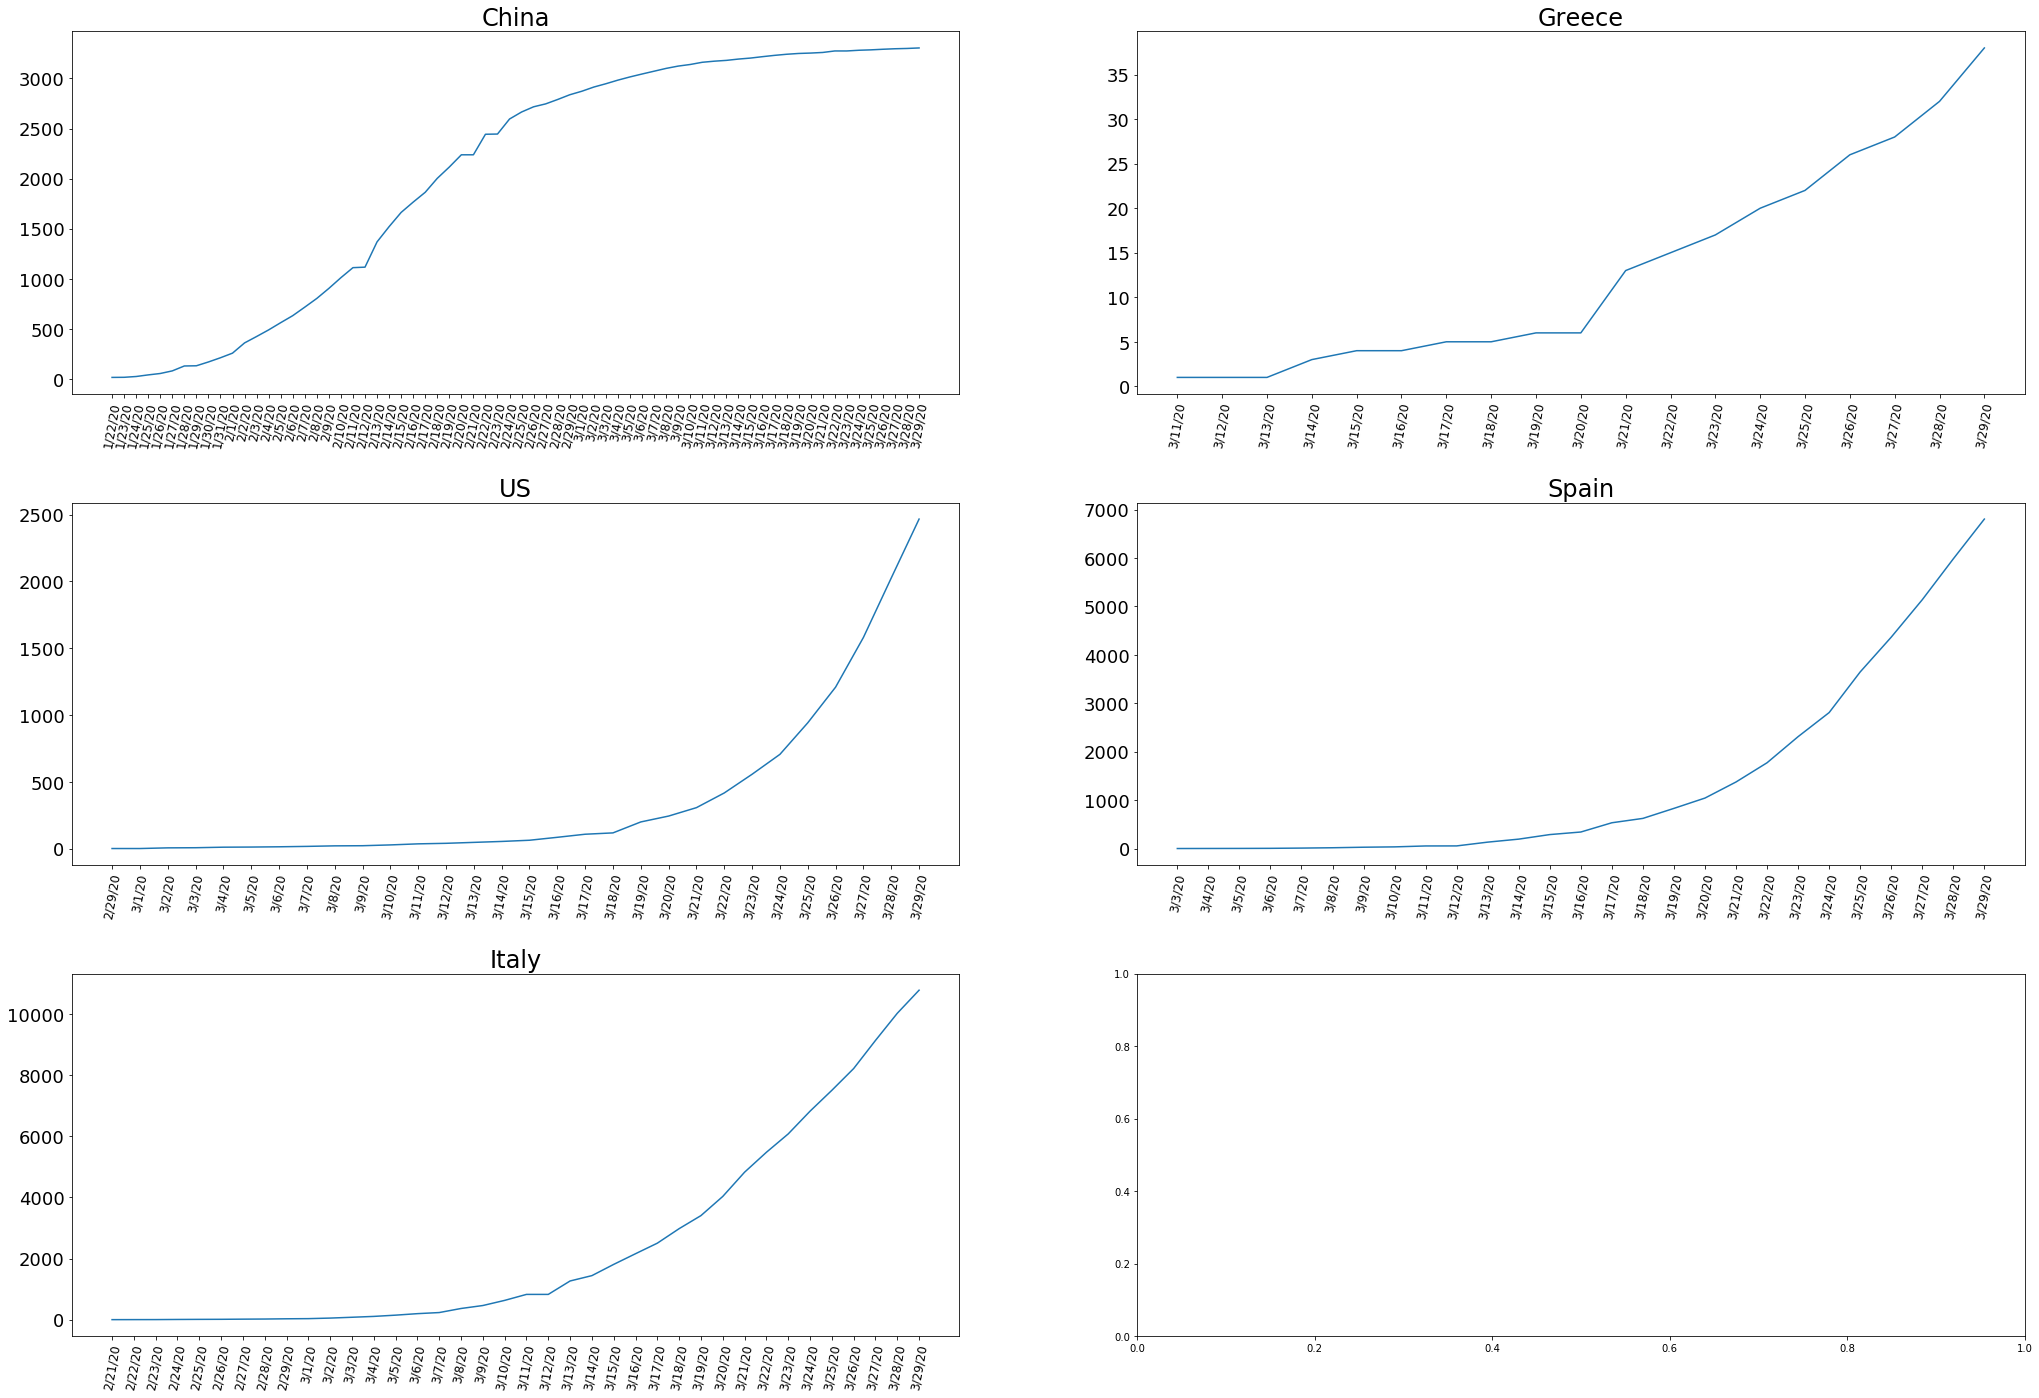

In [15]:
f, axes = plt.subplots(math.ceil(len(c_list)/2), 2)
f.set_figheight(24)
f.set_figwidth(35)
f.subplots_adjust(wspace=0.2,hspace=0.3)
x=0
y=0

for i in c_list:
    
    if Country_List[i] not in p_c_list:
        X = df[df['Country/Region']==Country_List[i]][df['Deaths']>0]['Date'].to_list()
        Y = df[df['Country/Region']==Country_List[i]][df['Deaths']>0]['Deaths'].to_list()
    else:
        X = df[df['Country/Region']==Country_List[i]]['Date'].unique()
        Y = []
        for j in X:
            Y.append(df[df['Country/Region']==Country_List[i]][df['Date']==j]['Deaths'].sum())
        
    for tick in axes[y][x].get_xticklabels():
        tick.set_rotation(80)
        tick.set_fontsize(12)
        
    for tick in axes[y][x].get_yticklabels():
        tick.set_fontsize(18)
        
    axes[y][x].set_title(Country_List[i],fontsize=24)
    axes[y][x].plot(X,Y)
    x+=1
    if x==2:
        x=0
        y+=1

We can (unfortunately) find out that the number of deaths is directly related to the number of incidents and the mortality rate seems to be confirming that, although it is rather unstable. Italy seems to be hit really hard :( ...

In [16]:
print('Mortality rate per country:')
for i in c_list+[Country_List.tolist().index('China')]:
    print(str(Country_List[i])+' : '+str(int(Deaths_List[i]/Confirmed_List[i]*1000)/10)+'%')

Mortality rate per country:
China : 4.0%
Greece : 3.2%
US : 1.7%
Spain : 8.4%
Italy : 11.0%
China : 4.0%
